# Action1_SupplyChain_回归预测

数据集：SupplyChainDataset.csv，供应链采购数据     To Do：      

对于销售额进行预测，即Sales字段     

对于订货数量进行预测，即Order Item Quantity


# 回归预测

In [78]:
# 将数据预处理后的data持久化
# import pickle
# with open('data.pkl', 'wb') as file:
#     pickle.dump(data, file)

In [5]:
import pickle
with open('data.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,MarySmith,2016,1,4,20,2016-01


In [7]:
train_data.drop(['Customer Email','Customer Password','Product Description','Product Status','Product Image','Customer Lname','Customer Fname'],axis=1,inplace=True) # drop掉列


# 把不相关的内容去掉,约定去掉一个轴方向即可
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer','Order Item Total','Order Profit Per Order','Product Card Id','Product Category Id','Product Price'],axis=1,inplace=True)


train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude','Longitude','Customer Street'],axis=1,inplace=True)


# 时间暂不处理drop掉
train_data.drop(['order date (DateOrders)'],axis=1,inplace=True)
train_data.drop(['order_month_year'],axis=1,inplace=True)


# 标签泄露处理
train_data.drop(['Order Status','Delivery Status'], axis=1, inplace=True)
train_data = train_data.dropna(subset=['Customer Full Name']) # 如果有缺失行则drop掉
train_data.shape

(180511, 34)

In [8]:
# 查看分类类型
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [9]:
# object类型labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[categorical_cols]

<ipython-input-9-f749d4954504>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cat] = le.fit_transform(train_data[cat])


,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3,1875
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3,5374
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3,4426
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3,12922
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3,10632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3,8421
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2,11672
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3,6296
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3,9379


In [10]:
# 得到所有数值类型
numerical_cols = train_data.columns.tolist()
for x in categorical_cols.tolist():
    numerical_cols.remove(x)
numerical_cols

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour']

In [11]:
# sales、quantity预测
import numpy as np
x_sales = train_data.loc[:, train_data.columns !='Sales']
y_sales = train_data['Sales']

x_quantity = train_data.loc[:, train_data.columns !='Order Item Quantity']
y_quantity = train_data['Order Item Quantity']

# 数据切分
from sklearn.model_selection import train_test_split
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size=0.2)


# 回归模型采用mae、mse
from sklearn.metrics import mean_absolute_error,mean_squared_error

def regression_model_stats(model, x_train, x_test, y_train, y_test, model_name='Sales'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print('{} MAE {}'.format(model_name,mae))
    print('{} MSE {}'.format(model_name,mse))
    return mae,mse

In [12]:
# 线性回归
from sklearn.linear_model import LinearRegression
model_sales = LinearRegression()
model_quantity = LinearRegression()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Salse')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')


Salse MAE 18.344640736562525
Salse MSE 948.8184011302435
Quantity MAE 0.34784489448206884
Quantity MSE 0.28090141001716146


(0.34784489448206884, 0.28090141001716146)

In [13]:
from sklearn.linear_model import Lasso
model_sales = Lasso()
model_quantity = Lasso()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Salse')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')


Salse MAE 18.735670374019097
Salse MSE 1043.2505689324869
Quantity MAE 0.3636172743322913
Quantity MSE 0.3031061321373935


(0.3636172743322913, 0.3031061321373935)

In [14]:
from sklearn.linear_model import Ridge
model_sales = Ridge()
model_quantity = Ridge()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Salse')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')


Salse MAE 18.340429537239196
Salse MSE 948.8533433975493
Quantity MAE 0.3478412877579668
Quantity MSE 0.28090137603091775


(0.3478412877579668, 0.28090137603091775)

In [15]:
#xgb
import xgboost as xgb
model_sales = xgb.XGBRegressor()
model_quantity = xgb.XGBRegressor()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Salse')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')


Salse MAE 0.019702915616425502
Salse MSE 0.013666812145199434
Quantity MAE 3.9548636889406856e-05
Quantity MSE 2.415691754731919e-08


(3.9548636889406856e-05, 2.415691754731919e-08)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

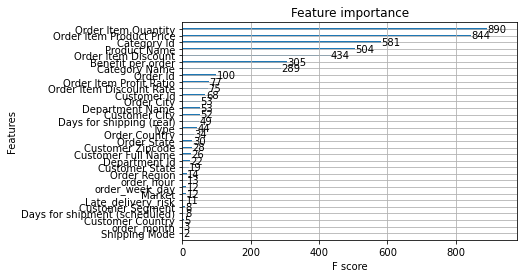

In [17]:
xgb.plot_importance(model_sales)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

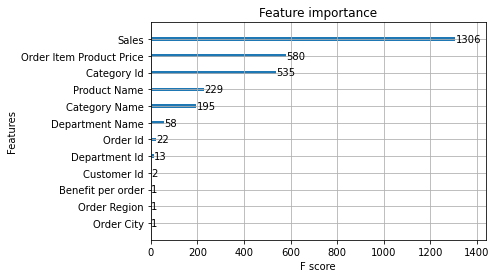

In [18]:
xgb.plot_importance(model_quantity)